In [129]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as sfa
import statsmodels.api as sma
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from statsmodels.stats.outliers_influence import variance_inflation_factor

import scipy.stats as stats

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [65]:
mpg = sns.load_dataset('mpg')

In [66]:
# objective: Train a LR model which could predict the milage of the car on the
# basis following information.
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [67]:
# LR model interpretation when independent model is category (mpg-origin)
mpg['origin'].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [68]:
mpg.groupby(by='origin')['mpg'].mean()

origin
europe    27.891429
japan     30.450633
usa       20.083534
Name: mpg, dtype: float64

In [69]:
origin = pd.get_dummies(mpg['origin'],dtype=int,drop_first=True)

In [70]:
origin

,japan,usa
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
393,0,1
394,0,0
395,0,1
396,0,1


In [71]:
origin = sma.add_constant(origin)

In [72]:
origin

,const,japan,usa
0,1.0,0,1
1,1.0,0,1
2,1.0,0,1
3,1.0,0,1
4,1.0,0,1
...,...,...,...
393,1.0,0,1
394,1.0,0,0
395,1.0,0,1
396,1.0,0,1


In [73]:
model = sma.OLS(mpg['mpg'],origin).fit()

In [74]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.54
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           1.92e-35
Time:                        01:41:17   Log-Likelihood:                -1302.0
No. Observations:                 398   AIC:                             2610.
Df Residuals:                     395   BIC:                             2622.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.8914      0.765     36.461      0.000      26.388      29.395
japan          2.5592      1.051      2.436      0.015       0.494       4.625
usa           -7.8079      0.866     -9.018      0.000      -9.510      -6.106
==============================================================================
Omnibus:                       24.959   Durbin-Watson:                   0.753
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.429
Skew:                           0.655   Prob(JB):                     6.71e-07
Kurtosis:                       3.021   Cond. No.                         5.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
# mpg = 27.8914 + (2.5592)*japan - 7.8079*(usa)
# europe 0,0
# japan 1,0
# usa 0,1

In [76]:
27.8914 + (2.5592)*1 # JAPAN

30.4506

In [77]:
27.8914 + (2.5592)*0 - 7.8079*(1) # USA 

20.0835

In [78]:
27.8914 + (2.5592)*0 - 7.8079*(0) # EUROPE

27.8914

In [79]:
# So basically it predicts the average of the target in that category !

In [80]:
# what if the category is not one hot encoding or dummy encoded
mpg.groupby(by='cylinders')['mpg'].mean()

cylinders
3    20.550000
4    29.286765
5    27.366667
6    19.985714
8    14.963107
Name: mpg, dtype: float64

<Axes: xlabel='cylinders', ylabel='mpg'>

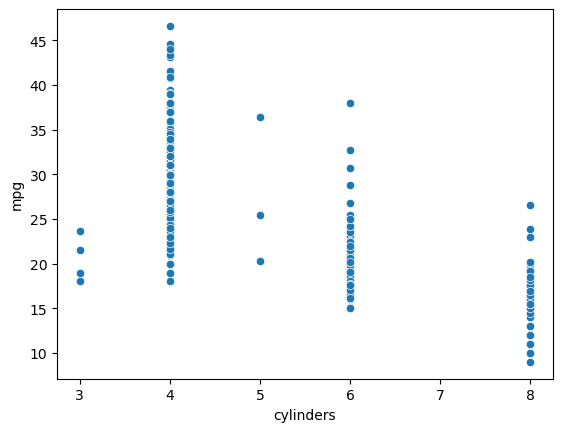

In [81]:
sns.scatterplot(x=mpg['cylinders'],y = mpg['mpg'])

In [82]:
cylinder = sma.add_constant(mpg['cylinders'])

In [83]:
model = sma.OLS(mpg['mpg'],cylinder).fit()

In [84]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     597.1
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           4.50e-81
Time:                        01:41:18   Log-Likelihood:                -1199.6
No. Observations:                 398   AIC:                             2403.
Df Residuals:                     396   BIC:                             2411.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.9493      0.833     51.557      0.000      41.312      44.587
cylinders     -3.5629      0.146    -24.435      0.000      -3.850      -3.276
==============================================================================
Omnibus:                       39.142   Durbin-Watson:                   1.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.841
Skew:                           0.704   Prob(JB):                     2.03e-12
Kurtosis:                       4.124   Cond. No.                         19.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
# mpg = 42.9493 - -3.5629*cylinders

In [86]:
print(42.9493 - 3.5629*3)
print(42.9493 - 3.5629*4)
print(42.9493 - 3.5629*5)
print(42.9493 - 3.5629*6)
print(42.9493 - 3.5629*8)

32.2606
28.6977
25.134800000000002
21.5719
14.446100000000001


<Axes: xlabel='cylinders', ylabel='mpg'>

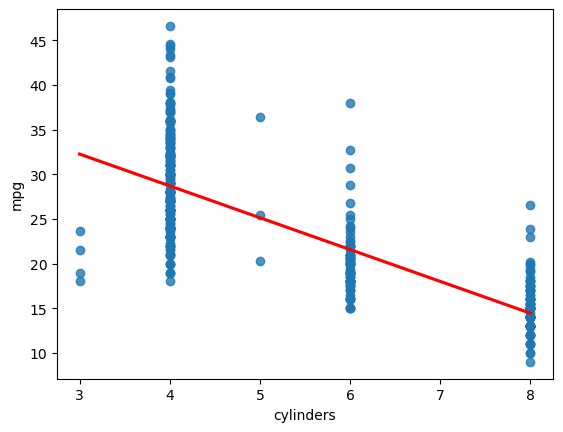

In [87]:
sns.regplot(x=mpg['cylinders'],y=mpg['mpg'],ci=0,line_kws={'color':'red'})

In [88]:
# here it regresses the model between the avg of each category

### Lets make  a LR model on This data

# **Data Preprocessing**

In [89]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [90]:

mpg.describe(include='object').T

,count,unique,top,freq
origin,398,3,usa,249
name,398,305,ford pinto,6


* **Missing Value imputation**

In [91]:
mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [92]:
mpg['horsepower'].fillna(mpg['horsepower'].median(),inplace=True)

In [93]:
# Dummy encoding on origin

In [94]:
mpg['name']

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
393              ford mustang gl
394                    vw pickup
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: name, Length: 398, dtype: object

In [95]:
mpg['brand'] = mpg['name'].str.split(expand=True).iloc[:,0]

In [96]:
top_10 = mpg['brand'].value_counts()[:10].index

In [97]:
top_10

Index(['ford', 'chevrolet', 'plymouth', 'amc', 'dodge', 'toyota', 'datsun',
       'buick', 'pontiac', 'volkswagen'],
      dtype='object')

In [98]:
def brands(brand):
    if brand not in top_10:
        return 'others'
    else:
        return brand

In [99]:
mpg['brand'] = mpg['brand'].apply(brands)

In [100]:
map_dict = mpg['brand'].value_counts().to_dict()

In [101]:
mpg['brand'] = mpg['brand'].map(map_dict)

In [102]:
del mpg['name']

In [103]:
mpg = pd.get_dummies(mpg,dtype=int)
del mpg['origin_usa']

In [104]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,brand,origin_europe,origin_japan
0,18.0,8,307.0,130.0,3504,12.0,70,43,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,17,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,31,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,28,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,51,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,51,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,121,1,0
395,32.0,4,135.0,84.0,2295,11.6,82,28,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,51,0,0


In [105]:
mpg['Engine para'] = mpg['horsepower']+mpg['weight']+mpg['cylinders']+mpg['displacement']+mpg['acceleration']
mpg.drop(columns=['horsepower','weight','cylinders','displacement','acceleration'],inplace=True)

<Axes: >

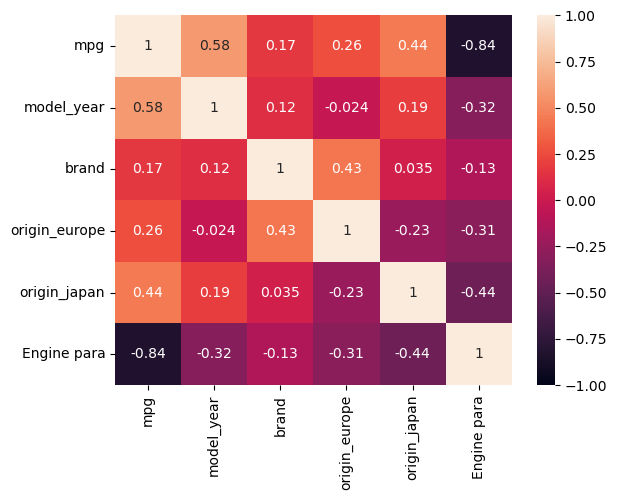

In [106]:
sns.heatmap(mpg.corr(),annot=True,vmax=1,vmin=-1)

### Build a base model

In [107]:
x = mpg.drop(columns=['mpg'])
y = mpg['mpg']

In [108]:
x_train , x_test,y_train,y_test = train_test_split(x,y,train_size=0.80,random_state=2)

In [109]:
print(x_train.shape , x_test.shape,y_train.shape,y_test.shape)

(318, 5) (80, 5) (318,) (80,)


In [110]:
# Assumptions 1 : target is number
# Assumptions 2 : check multicollinearity


In [111]:
# 2. check for the multicollinearity 

# VIF

# VIF
vif_list = []

for i in range(x_train.shape[1]):

    vif_list.append(variance_inflation_factor(x_train.values,i))

                    

pd.DataFrame({'Feature Names':x_train.columns,'VIF':vif_list}).sort_values(by='VIF',ascending=False)

,Feature Names,VIF
0,model_year,21.790668
4,Engine para,16.109106
1,brand,4.081041
2,origin_europe,1.974735
3,origin_japan,1.797227


In [112]:
# fit a model
x_train_c = sma.add_constant(x_train)
x_test_c = sma.add_constant(x_test)

base_model = sma.OLS(y_train,x_train_c).fit()
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     252.2
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          2.67e-107
Time:                        01:44:55   Log-Likelihood:                -846.80
No. Observations:                 318   AIC:                             1706.
Df Residuals:                     312   BIC:                             1728.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -17.2696      4.707     -3.669      0.000     -26.530      -8.009
model_year        0.7559      0.057     13.225      0.000       0.643       0.868
brand            -0.0068      0.006     -1.212      0.227      -0.018       0.004
origin_europe     2.3723      0.692      3.430      0.001       1.012       3.733
origin_japan      1.7963      0.609      2.951      0.003       0.599       2.994
Engine para      -0.0052      0.000    -19.702      0.000      -0.006      -0.005
==============================================================================
Omnibus:                       28.525   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.686
Skew:                           0.579   Prob(JB):                     1.98e-10
Kurtosis:                       4.426   Cond. No.                     8.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [114]:
# In order to have the final conclusion lets apply rainbow test to check for linearity.
from statsmodels.stats.diagnostic import linear_rainbow
# this is new test (test for linearity of variable)

# Ho: Variables are linear
# Ha: Variables are not linear

p_value = linear_rainbow(base_model)[1]

if p_value<0.05:
    print('Reject Ho : Variables are not linear')
else:
    print('Fail to Reject Ho : Variables are linear')

Fail to Reject Ho : Variables are linear


In [115]:
# Assumption of Homoscidasticity

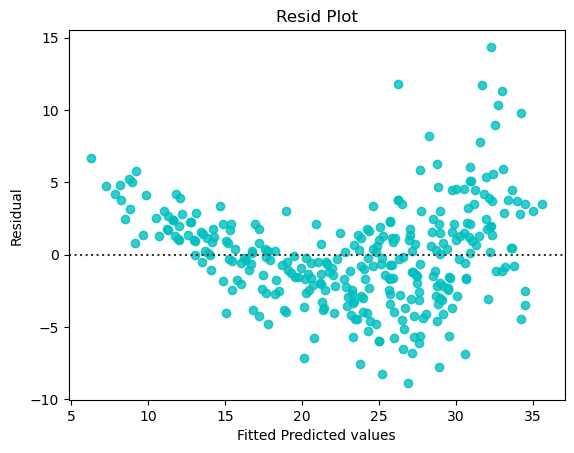

In [116]:
# residual Plot
sns.residplot(x=base_model.fittedvalues,y=base_model.resid,color='c')
plt.xlabel('Fitted Predicted values')
plt.ylabel('Residual')
plt.title('Resid Plot')
plt.show()

In [117]:
# Breusch Pagan test

# Ho : The variance is same: Homoscedasticity
# Ha : The variance is not same : Hetroscedasticity

p_value = sma.stats.diagnostic.het_breuschpagan(resid = base_model.resid,exog_het=base_model.model.exog)[1]

if p_value>0.05:
    print('Fail to Reject Ho')
else:
    print('Reject Ho')
print(p_value)

Reject Ho
2.9792979132527944e-06


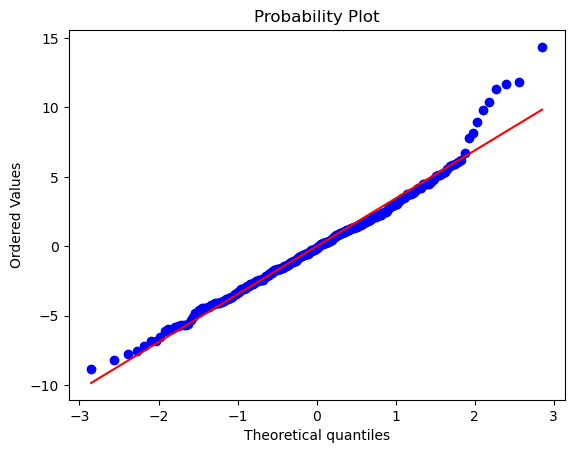

In [118]:
# Assumption for normality .
# qqplot for distribution
stats.probplot(base_model.resid,plot=plt)
plt.show()

In [120]:
# Shapiro-Wilk Test n<5000
# Ho: The residuals are normal
# Ha: The residuals are not normal


p_value = stats.shapiro(base_model.resid)[1]
if p_value>0.05:
    print('Fail to reject Ho : Residuals are normal')
else:
    print('Reject Ho : Residuals are not normal')
print(p_value)

Reject Ho : Residuals are not normal
5.0687198381638154e-05


In [226]:
# summary 
# Assumption 1 :number target met
# Assumption 2 :multicollinearity not met (category)
# Assumption 3 : linearity : met
# Assumption 4 : Autocorrelation : met
# Assumption 5 : Homoscedasticity : not met
# Assumption 6 : residual Normality : not met

In [121]:
# As per p values these is signicance order
base_model.pvalues.sort_values()

Engine para      1.039520e-56
model_year       5.272542e-32
const            2.860637e-04
origin_europe    6.838864e-04
origin_japan     3.407523e-03
brand            2.265045e-01
dtype: float64

## Validation:

In [130]:
def validation(test,pred,data):
    r2 = r2_score(test,pred)
    print('R Squared:',r2)
    n = data.shape[0]
    k = data.shape[1]
    r2_adj = 1 - ((1-r2)*(n-1)/(n-k-1))
    print('Adj R Square:',r2_adj)
    print('MSE:',mean_squared_error(test,pred))
    print('RMSE:',np.sqrt(mean_squared_error(test,pred)))
    print('MAE:',mean_absolute_error(test,pred))
    print('MAPE:',mean_absolute_percentage_error(test,pred))

In [131]:
# Train dataset
pred_train = base_model.predict(x_train_c)

validation(y_train,pred_train,x_train_c)

R Squared: 0.801652744344105
Adj R Square: 0.7978261091867566
MSE: 12.036409976272013
RMSE: 3.469352962192232
MAE: 2.654530531898785
MAPE: 0.12167122749062433


In [132]:
# test dataset
pred_test = base_model.predict(x_test_c)

validation(y_test,pred_test,x_test_c)

R Squared: 0.8661637424748252
Adj R Square: 0.8551635021302902
MSE: 8.232435495695409
RMSE: 2.8692221063722845
MAE: 2.192044064536154
MAPE: 0.09921209103567048


In [133]:
# it seems that the model is good fit or very lil variance

#### Make the prediction

In [134]:
# Lets assume some input data

In [135]:
origonal = sns.load_dataset('mpg')

In [136]:
#origonal
cyl = 6
displ = 200
hsp = 200
weight = 4000
accl = 20
model = 80
origin = 'usa'
name = 'ford'

In [137]:
eng_p = cyl+displ+hsp+weight+accl
model = 80
org_japan = 0
org_europe = 0
name = 51

In [138]:
base_model.predict(np.array([1,80,51,0,0,eng_p]))

array([19.71214482])